# Data description


We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

Size of training set: 5961 records

Size of test set: 1987 records



FEATURES:

Qualification: Qualification and degrees held by the doctor

Experience: Experience of the doctor in number of years

Rating: Rating given by patients

Profile: Type of the doctor

Miscellaneous_Info: Extra information about the doctor

Fees: Fees charged by the doctor (Target Variable)

Place: Area and the city where the doctor is located.

# Importing required Libraries

In [780]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [781]:
df_train = pd.read_excel('Final_Train.xlsx')
df_train.shape

(5961, 7)

In [782]:
df_test = pd.read_excel('Final_Test.xlsx')
df_test.shape

(1987, 6)

In [783]:
df_train['Source'] = "Train"

In [784]:
df_test['Source'] = "Test"

In [785]:
df = pd.concat([df_train,df_test])

In [786]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train


In [787]:
df.shape

(7948, 8)

we have 7948 rows and 8 columns

In [788]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                4392
Place                   31
Profile                  0
Miscellaneous_Info    3454
Fees                  1987
Source                   0
dtype: int64

<AxesSubplot:>

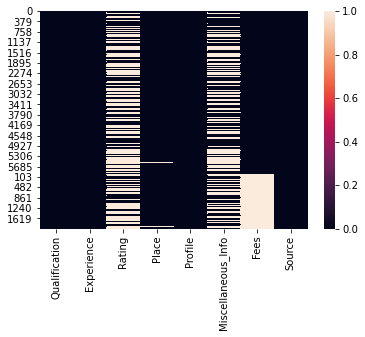

In [789]:
sns.heatmap(df.isnull())

Here, we have to remove mising values for Rating, Place and Miscellaneous_Info.

In [790]:
df.dtypes

Qualification          object
Experience             object
Rating                 object
Place                  object
Profile                object
Miscellaneous_Info     object
Fees                  float64
Source                 object
dtype: object

All the variables have object data type except Target variables.. we will have to do the encoding for them.

# Data cleaning

In [791]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train
...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,Test
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,Test
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN,NaN,Test
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,Test


In [792]:
df['Experience'] = df['Experience'].str.replace('years experience','').astype(int)

In [793]:
df['Rating'] = df['Rating'].str[0:-1].astype(float)

In [794]:
df['Place'].fillna('none, none', inplace=True)

In [795]:
df['City'] = df['Place'].str.rsplit(',', 1).str.get(1)

In [796]:
df['City'] = df['City'].str.strip()

In [797]:
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source,City
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100.0,Train,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350.0,Train,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300.0,Train,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250.0,Train,Bangalore
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250.0,Train,Chennai
...,...,...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN,NaN,Test,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,"Choolai, Chennai",Dermatologists,NaN,NaN,Test,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,"Porur, Chennai",General Medicine,NaN,NaN,Test,Chennai
1985,BDS,12,98.0,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...,NaN,Test,Bangalore


we can drop the column Miscellaneous_Info and Place as we have alredy extracted the useful info.

In [798]:
df.drop(['Place','Miscellaneous_Info'],axis=1,inplace=True)

In [799]:
df

,Qualification,Experience,Rating,Profile,Fees,Source,City
0,"BHMS, MD - Homeopathy",24,100.0,Homeopath,100.0,Train,Ernakulam
1,"BAMS, MD - Ayurveda Medicine",12,98.0,Ayurveda,350.0,Train,Bangalore
2,"MBBS, MS - Otorhinolaryngology",9,NaN,ENT Specialist,300.0,Train,Bangalore
3,"BSc - Zoology, BAMS",12,NaN,Ayurveda,250.0,Train,Bangalore
4,BAMS,20,100.0,Ayurveda,250.0,Train,Chennai
...,...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10,NaN,Ayurveda,NaN,Test,Bangalore
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4,NaN,Dermatologists,NaN,Test,Chennai
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9,NaN,General Medicine,NaN,Test,Chennai
1985,BDS,12,98.0,Dentist,NaN,Test,Bangalore


In [800]:
df.dtypes

Qualification     object
Experience         int32
Rating           float64
Profile           object
Fees             float64
Source            object
City              object
dtype: object

In [801]:
df['Qualification'].unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Medicine, Post Graduate Diploma in Diabetology (PGDD), MBBS, FRCP - Internal Medicine',
       'MBBS, MS - General Surgery, FAIS, FIAGES',
       'MBBS, MD / MS - Obstetrics & Gynaecology'], dtype=object)

In [802]:
df['Qualification'].value_counts()[:30]

BDS                                                      632
BHMS                                                     627
BAMS                                                     624
MBBS                                                     441
MBBS, MS - ENT                                           280
MBBS, MD - Dermatology                                   242
MBBS, MD - General Medicine                              227
MBBS, MD - Dermatology , Venereology & Leprosy           193
MBBS, DDVL                                               123
BHMS, MD - Homeopathy                                    120
MBBS, Diploma in Otorhinolaryngology (DLO)               114
BAMS, MD - Ayurveda Medicine                             106
BDS, MDS - Conservative Dentistry & Endodontics           89
MBBS, DDV                                                 81
BDS, MDS                                                  77
BDS, MDS - Oral & Maxillofacial Surgery                   76
MD - Dermatology , Vener

In [803]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for i in x:
        i = i.strip()
        if i in Qualification:
            Qualification[i] = Qualification[i]+1
        else:
            Qualification[i]=1

In [804]:
Qualification

{'BHMS': 998,
 'MD - Homeopathy': 243,
 'BAMS': 1007,
 'MD - Ayurveda Medicine': 180,
 'MBBS': 3788,
 'MS - Otorhinolaryngology': 145,
 'BSc - Zoology': 4,
 'BDS': 1791,
 'MD - General Medicine': 384,
 'BSc': 6,
 'MS': 2,
 'DNB - ENT': 150,
 'MDS': 103,
 'MDS - Oral & Maxillofacial Surgery': 136,
 'Diploma in Otorhinolaryngology (DLO)': 335,
 'MF- Homeopathy': 6,
 'MS - ENT': 539,
 'DNB': 77,
 'Fellowship of College of General Practice (FCGP)': 15,
 'DDVL': 228,
 'IBCLC (USA)': 1,
 'Post Graduate Diploma in Diabetology (PGDD)': 78,
 'Diploma in Dermatology': 86,
 'Fellowship in Aesthetic Medicine': 28,
 'DM - Neurology': 7,
 'MD - Pediatrics': 15,
 'Fellowship in Cleft Lip and Craniofacial Surgery': 1,
 'Diploma in Cosmetology': 8,
 'AFIH': 7,
 'MDS - Prosthodontist And Crown Bridge': 66,
 'M. D. Hom. (Practice of Medicine)': 2,
 'Diploma in Emergency Medicine': 12,
 'Diploma in Counselling Skills': 2,
 'DHMS (Diploma in Homeopathic Medicine and Surgery)': 62,
 'MD - Dermatology': 802,

In [805]:
rep = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
Qualifications =[]
for i in rep:
    Qualifications.append(i[0])

In [806]:
Qualifications

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [807]:
for s in Qualifications:
    df[s]=0
    
for x,y in zip(df["Qualification"].values,np.array([i for i in range(len(df))])):
    for j in x:
        j = j.strip()
        if j in Qualifications:
            df[j][y] = 1
            
df.drop("Qualification",axis=1,inplace=True)

In [808]:
df

,Experience,Rating,Profile,Fees,Source,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.0,Homeopath,100.0,Train,Ernakulam,0,0,0,1,0,0,0,0,0,1
1,12,98.0,Ayurveda,350.0,Train,Bangalore,0,0,1,0,0,0,0,0,0,0
2,9,NaN,ENT Specialist,300.0,Train,Bangalore,1,0,0,0,0,0,0,0,0,0
3,12,NaN,Ayurveda,250.0,Train,Bangalore,0,0,1,0,0,0,0,0,0,0
4,20,100.0,Ayurveda,250.0,Train,Chennai,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,NaN,Ayurveda,NaN,Test,Bangalore,0,0,1,0,0,0,0,0,0,0
1983,4,NaN,Dermatologists,NaN,Test,Chennai,1,0,0,0,1,0,0,0,0,0
1984,9,NaN,General Medicine,NaN,Test,Chennai,0,0,0,1,0,0,0,0,0,1
1985,12,98.0,Dentist,NaN,Test,Bangalore,1,0,0,0,0,1,0,0,0,0


In [809]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = "most_frequent")
df["Rating"] =imp.fit_transform(df["Rating"].values.reshape(-1,1))
df['City'] = imp.fit_transform(df['City'].values.reshape(-1,1))

In [810]:
df.isnull().sum()

Experience                                 0
Rating                                     0
Profile                                    0
Fees                                    1987
Source                                     0
City                                       0
MBBS                                       0
BDS                                        0
BAMS                                       0
BHMS                                       0
MD - Dermatology                           0
MS - ENT                                   0
Venereology & Leprosy                      0
MD - General Medicine                      0
Diploma in Otorhinolaryngology (DLO)       0
MD - Homeopathy                            0
dtype: int64

# Data Visualization

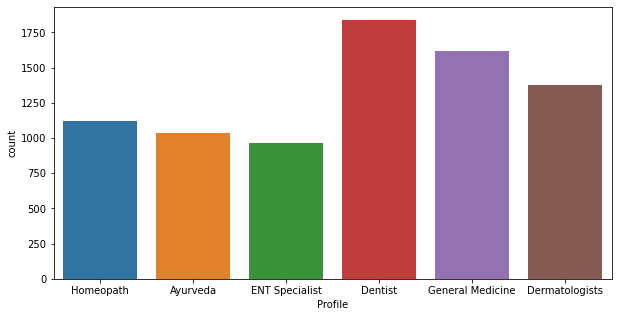

In [811]:
plt.figure(figsize = (10,5))
sns.countplot(x="Profile",data=df)
plt.show()

We have maximum number of dentists

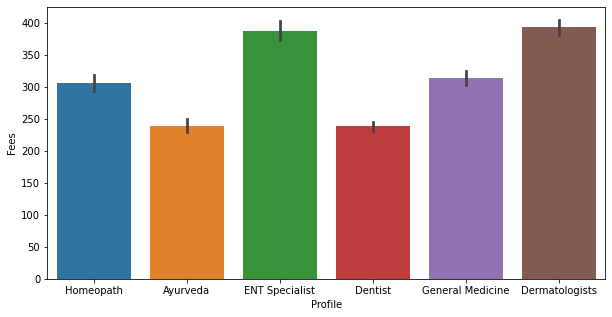

In [812]:
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df)
plt.show()

Consultation fees of ENT and Dermatologist is highest

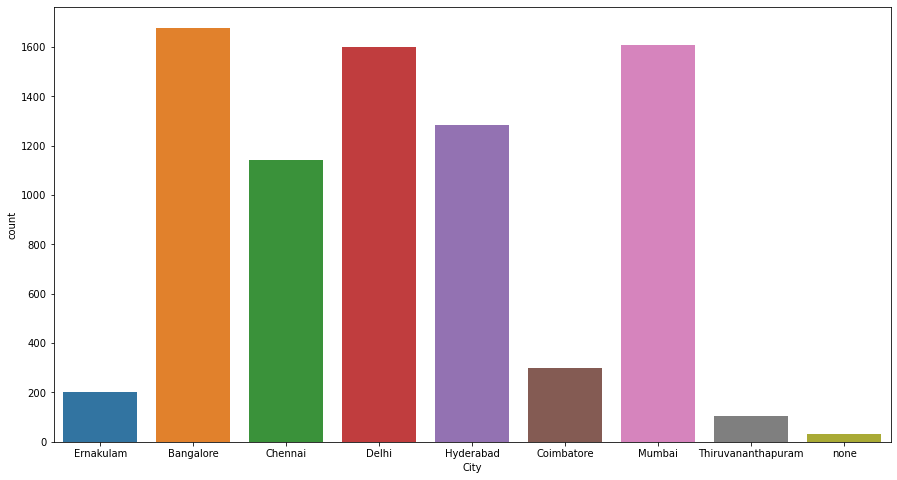

In [813]:
plt.figure(figsize = (15,8))
sns.countplot(x="City", data=df)
plt.show()

Maximum number of consultation is done by Bangalore, Delhi and Mumbai doctors.

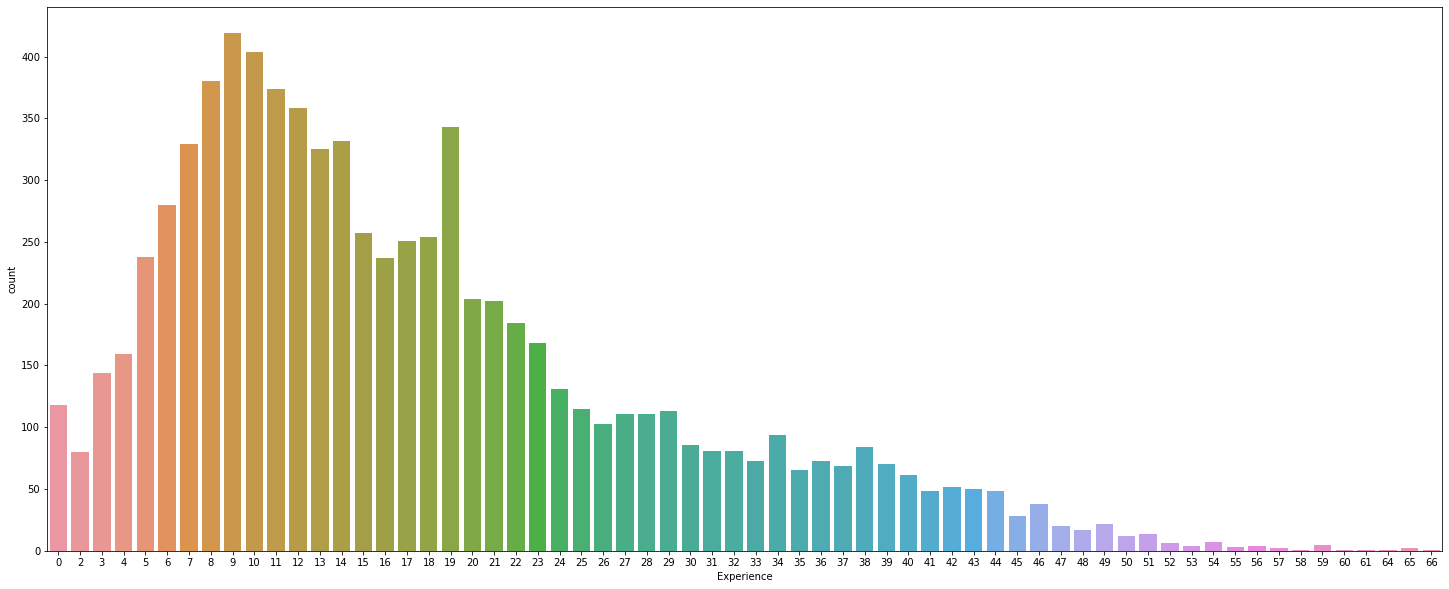

In [814]:
plt.figure(figsize = (25,10))
sns.countplot(x="Experience", data=df)
plt.show()

Majority of doctors have experience between 5 -25 years

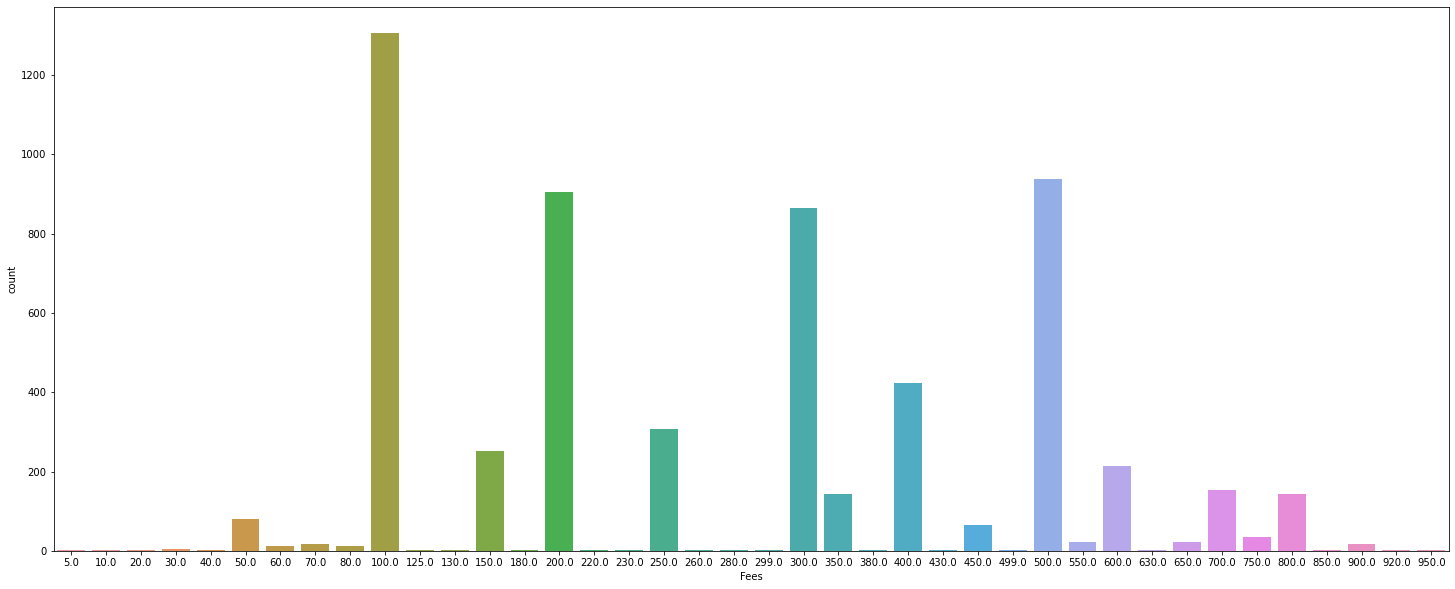

In [815]:
plt.figure(figsize = (25,10))
sns.countplot(x="Fees", data=df)
plt.show()

Majority of doctors are charging round figure like 100,200,300,400,500

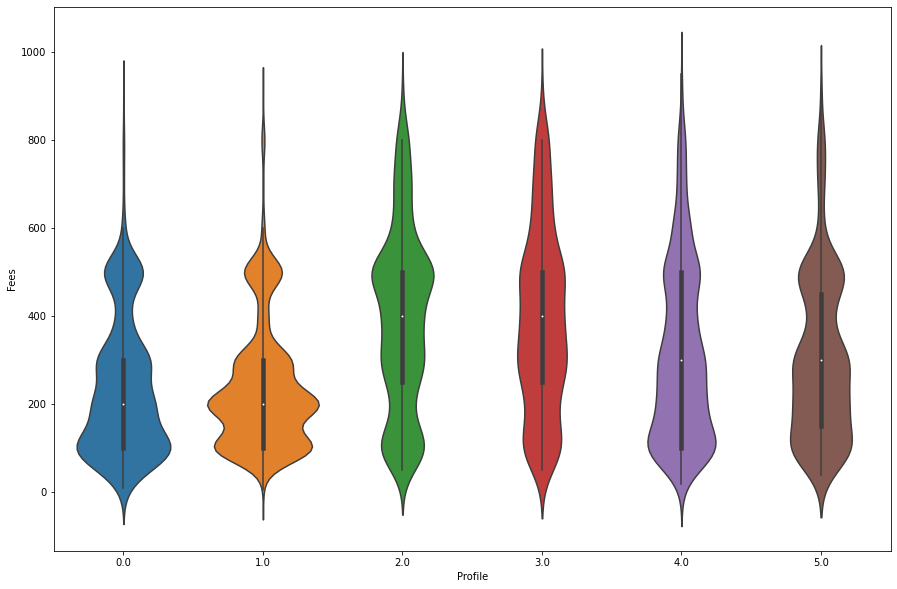

In [871]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Profile', y='Fees', data= df)
plt.show()

Homeopath, Ayurveda, Dentists are mostly charginging between 100 to 600.
However, ENT specialist, dermatologist and general medicine charges more than 600 also.

# Encoding the dataframe

In [817]:
df.dtypes

Experience                                int32
Rating                                  float64
Profile                                  object
Fees                                    float64
Source                                   object
City                                     object
MBBS                                      int64
BDS                                       int64
BAMS                                      int64
BHMS                                      int64
MD - Dermatology                          int64
MS - ENT                                  int64
Venereology & Leprosy                     int64
MD - General Medicine                     int64
Diploma in Otorhinolaryngology (DLO)      int64
MD - Homeopathy                           int64
dtype: object

In [818]:
from sklearn.preprocessing import OrdinalEncoder

In [819]:
oe=OrdinalEncoder()

In [820]:
df.columns

Index(['Experience', 'Rating', 'Profile', 'Fees', 'Source', 'City', 'MBBS',
       'BDS', 'BAMS', 'BHMS', 'MD - Dermatology', 'MS - ENT',
       'Venereology & Leprosy', 'MD - General Medicine',
       'Diploma in Otorhinolaryngology (DLO)', 'MD - Homeopathy'],
      dtype='object')

In [821]:
for i in df.columns:
    if df[i].dtypes == 'O':
        df[i] = oe.fit_transform(df[i].values.reshape(-1,1))

In [822]:
df

,Experience,Rating,Profile,Fees,Source,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.0,5.0,100.0,1.0,4.0,0,0,0,1,0,0,0,0,0,1
1,12,98.0,0.0,350.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0
2,9,100.0,3.0,300.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0
3,12,100.0,0.0,250.0,1.0,0.0,0,0,1,0,0,0,0,0,0,0
4,20,100.0,0.0,250.0,1.0,1.0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,10,100.0,0.0,NaN,0.0,0.0,0,0,1,0,0,0,0,0,0,0
1983,4,100.0,2.0,NaN,0.0,1.0,1,0,0,0,1,0,0,0,0,0
1984,9,100.0,4.0,NaN,0.0,1.0,0,0,0,1,0,0,0,0,0,1
1985,12,98.0,1.0,NaN,0.0,0.0,1,0,0,0,0,1,0,0,0,0


# Checking the correlation

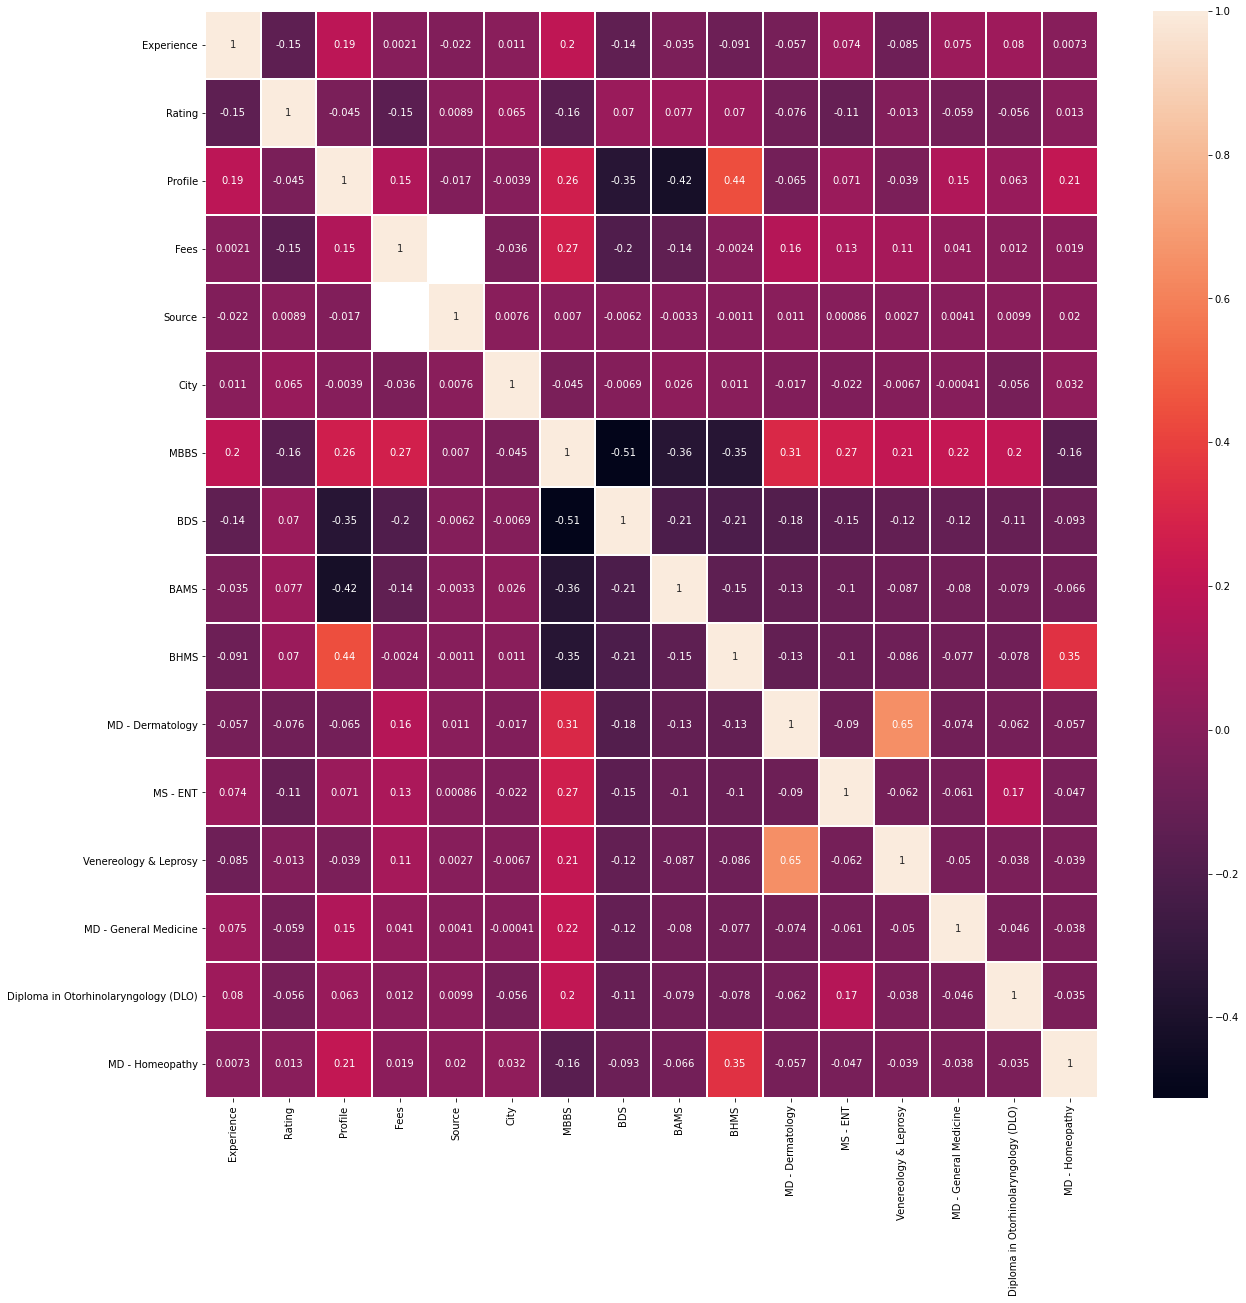

In [823]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, linewidths=1.0)
plt.show()

Observation:
- Experience is positively correlated to MBBS.
- Profile is positively correlated to BHMS and MBBS, negatively correlated to BDS and BAMS.
- Fees is positively correlated to MBBS.
- MBBS is positively correlated to MD-Dermatology, MS-ENT, Fees, Profile and negatively correlated to BDS, BAMS and BHMS.
- BDS is negatively correlated to MBBS and Profile.
- BAMS is negatively correlated to MBBS and Profile.
- BHMS is positively correlated to MD-Homeopathy and Profile.
- Dermatology is positively correlated to Venereology and Leprosy, MBBS.
- MS-ENT is positively correlated to MBBS.


<Figure size 1008x720 with 0 Axes>

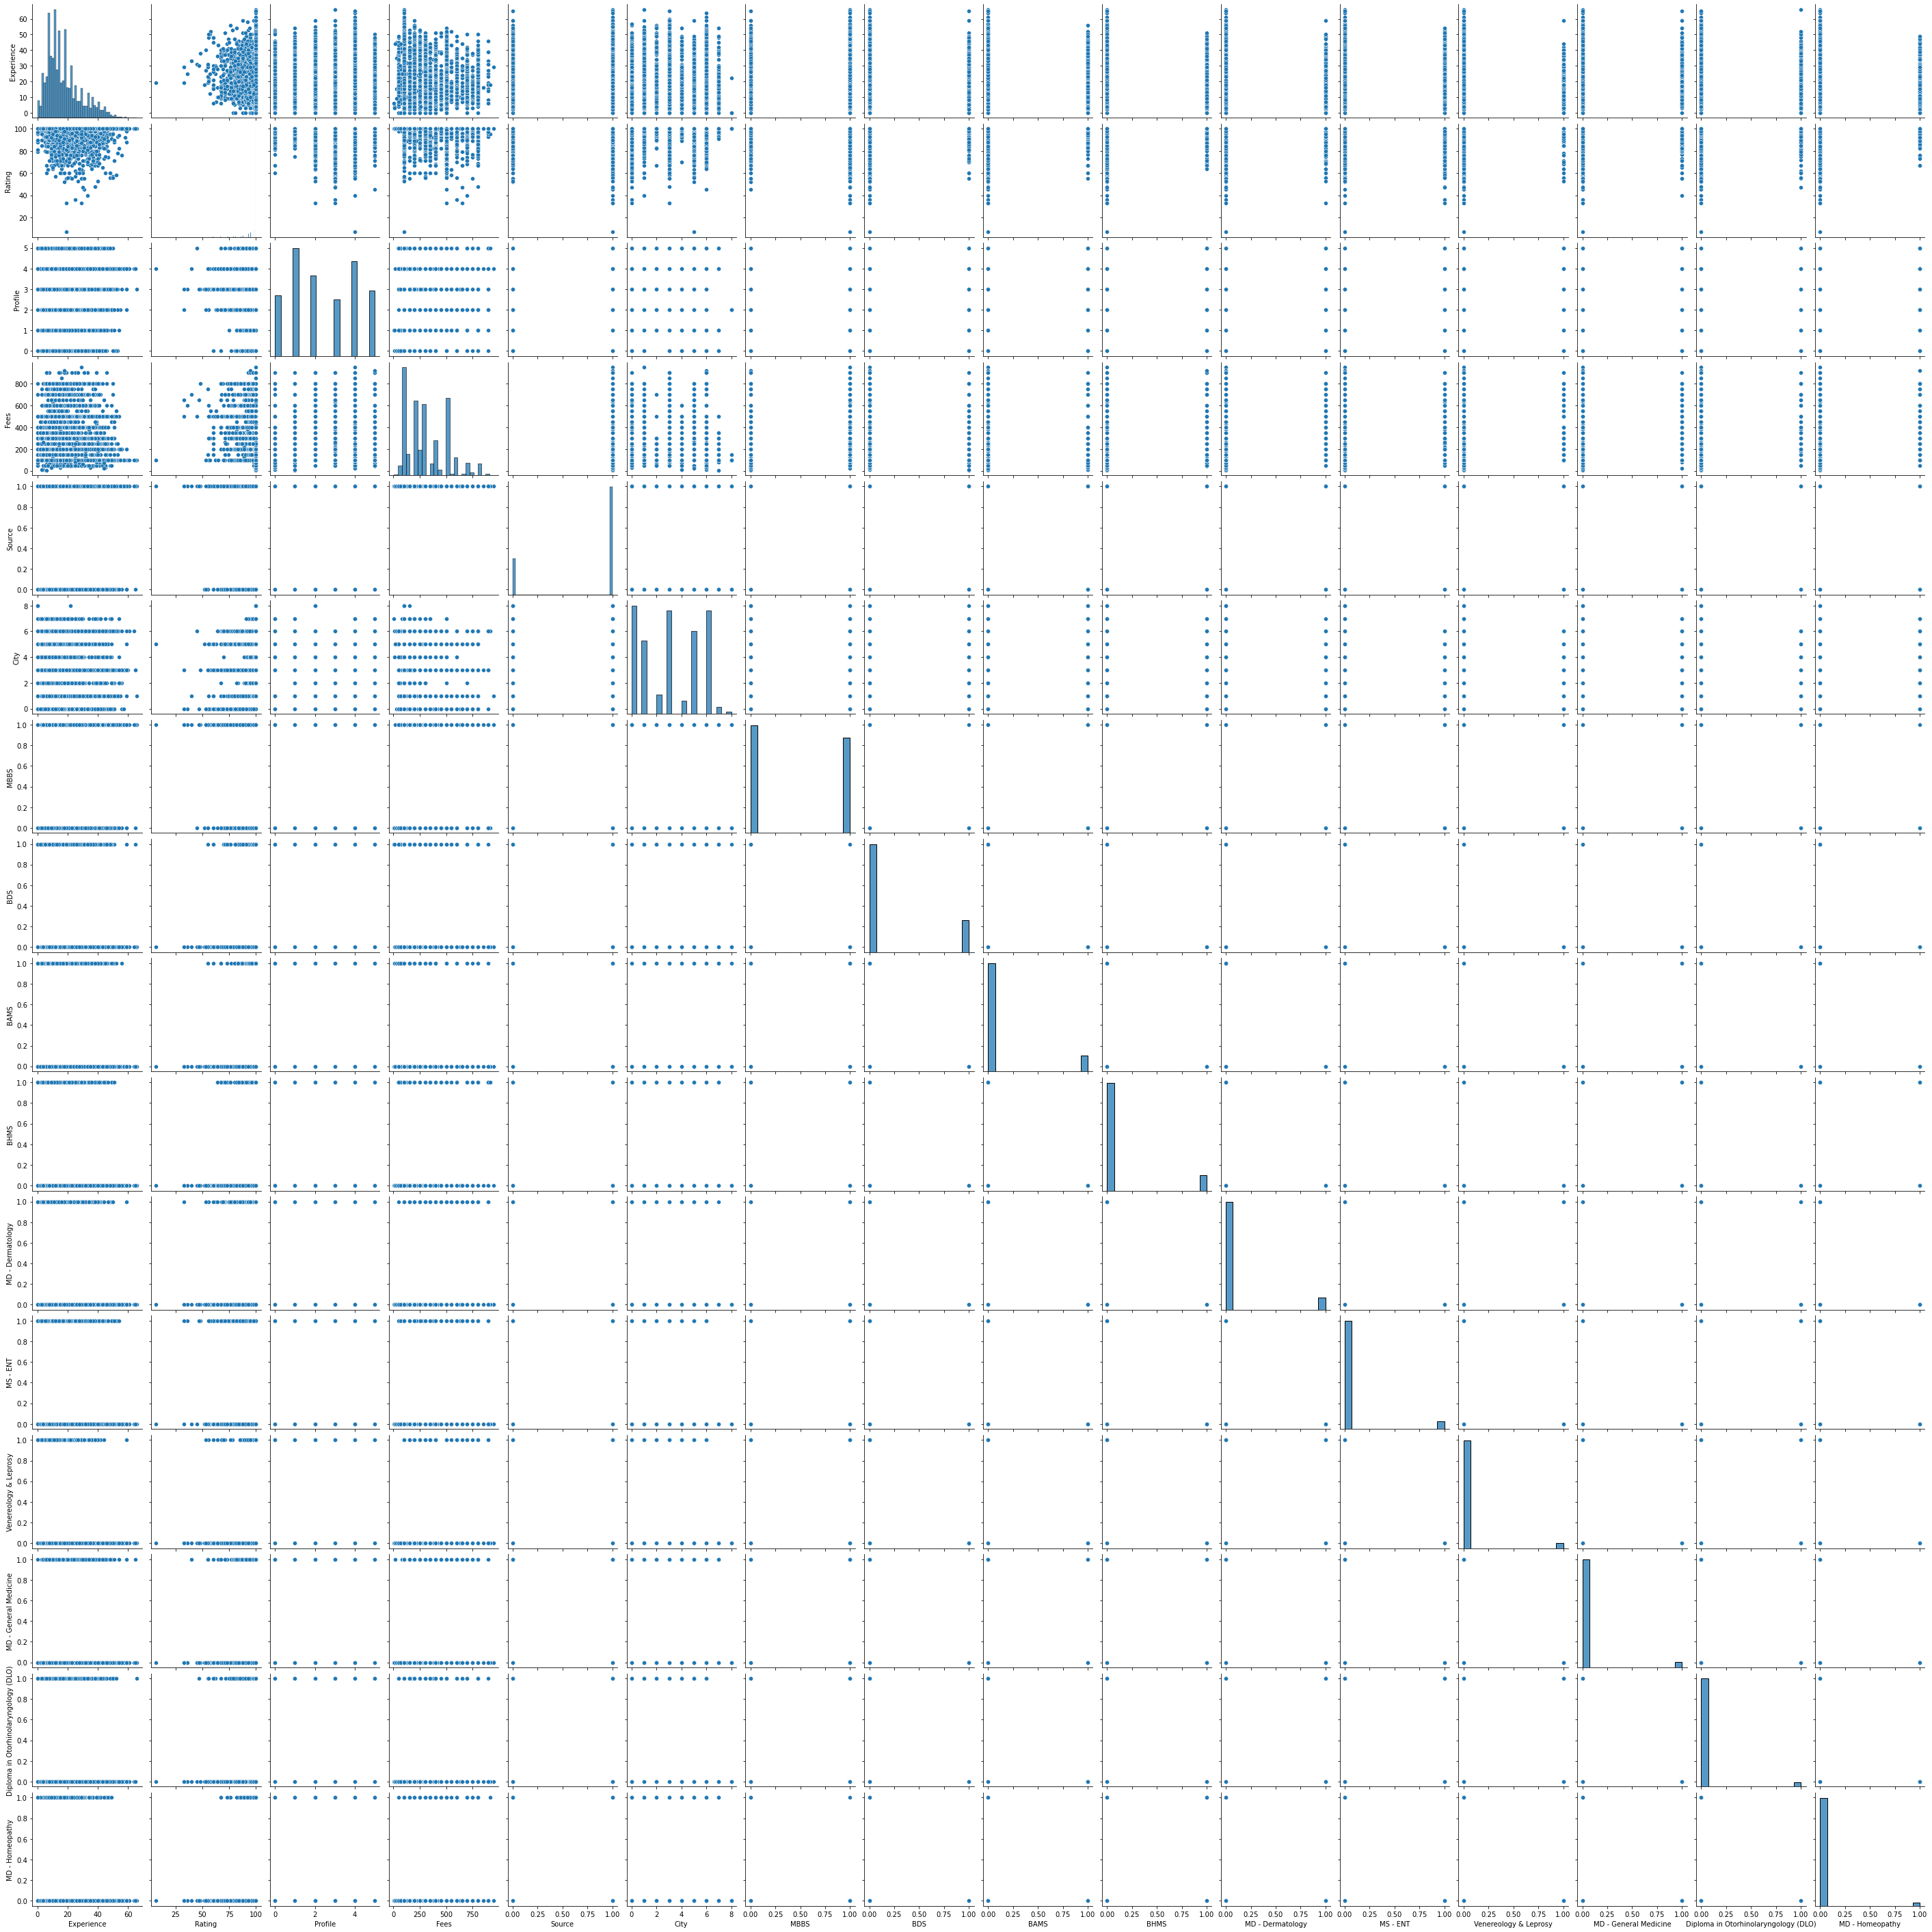

In [824]:
plt.figure(figsize=[14,10])
sns.pairplot(df)
plt.show()

Its difficult to analyse anything from this as there are too many columns

In [825]:
df.describe()

,Experience,Rating,Profile,Fees,Source,City,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
count,7948.000000,7948.000000,7948.000000,5961.000000,7948.00000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000,7948.000000
mean,17.446653,97.580649,2.458606,307.944640,0.75000,3.068067,0.468546,0.229995,0.128460,0.125692,0.099522,0.068822,0.048817,0.047307,0.040639,0.028435
std,11.201217,5.859426,1.657217,190.920373,0.43304,2.303623,0.499041,0.420856,0.334622,0.331523,0.299380,0.253168,0.215499,0.212309,0.197465,0.166222
min,0.000000,7.000000,0.000000,5.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,98.000000,1.000000,150.000000,0.75000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,100.000000,2.000000,300.000000,1.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,23.000000,100.000000,4.000000,500.000000,1.00000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,66.000000,100.000000,5.000000,950.000000,1.00000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Except Fees, none of the variable has null value.

There seems to be skewness in some columns, however, we will check it separately.

# Checking the Outliers and data distribution

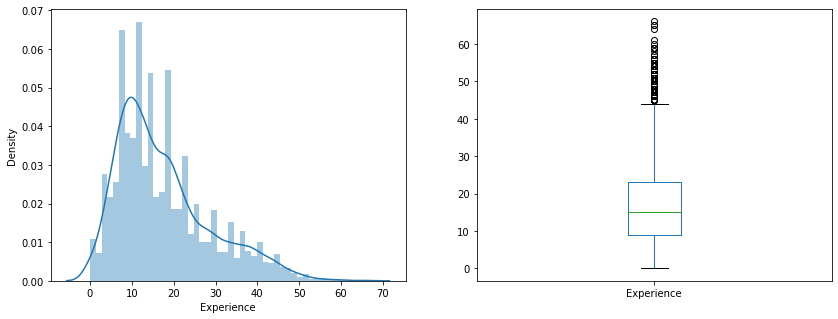

<Figure size 1008x360 with 0 Axes>

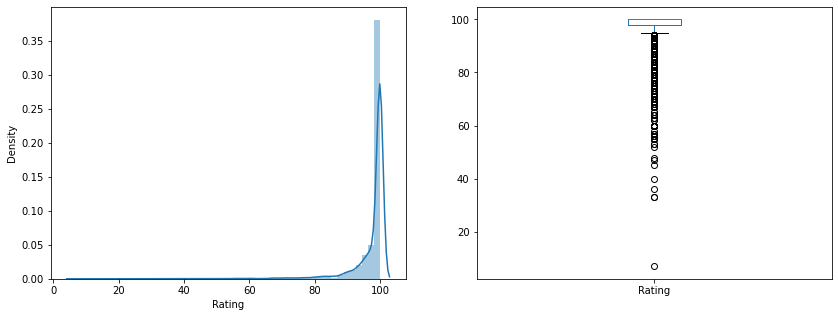

<Figure size 1008x360 with 0 Axes>

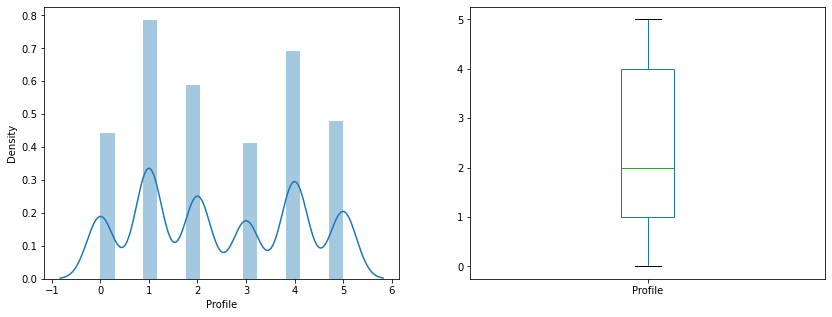

<Figure size 1008x360 with 0 Axes>

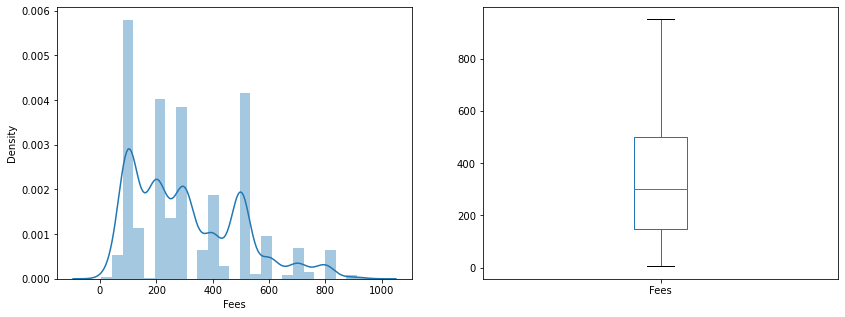

<Figure size 1008x360 with 0 Axes>

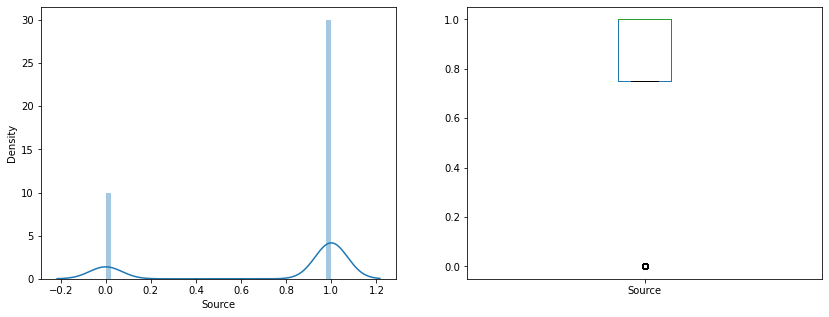

<Figure size 1008x360 with 0 Axes>

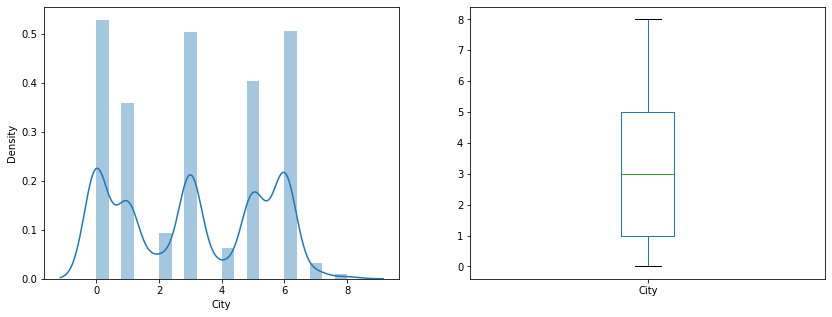

<Figure size 1008x360 with 0 Axes>

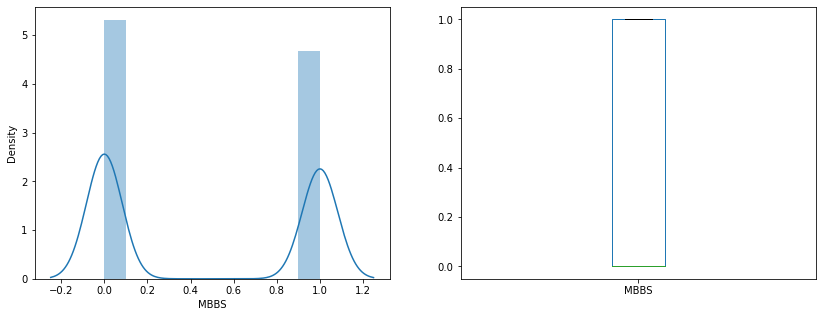

<Figure size 1008x360 with 0 Axes>

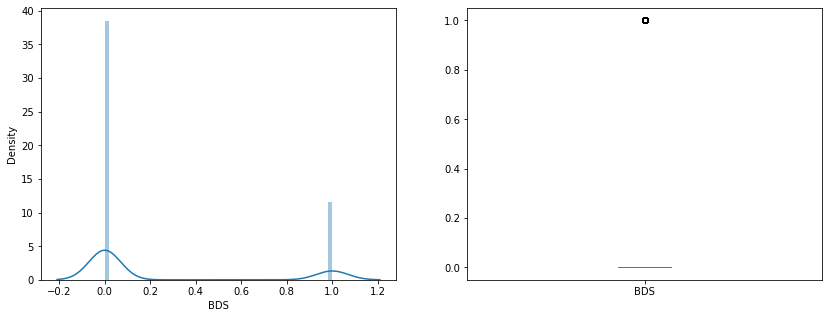

<Figure size 1008x360 with 0 Axes>

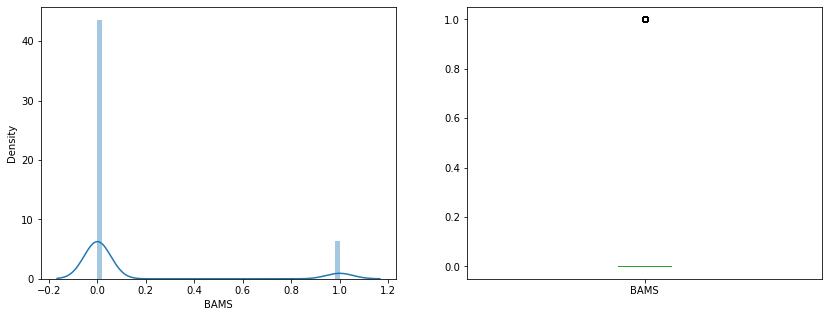

<Figure size 1008x360 with 0 Axes>

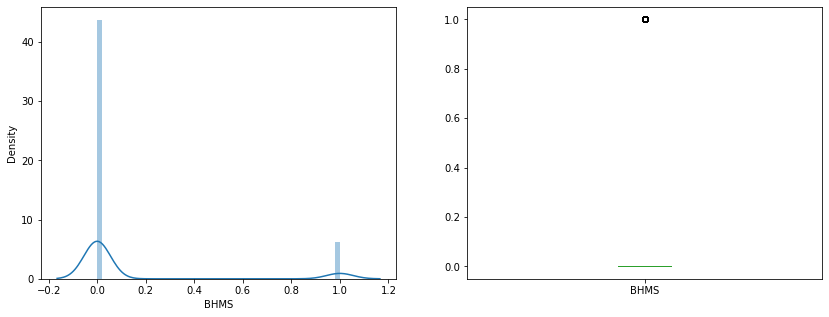

<Figure size 1008x360 with 0 Axes>

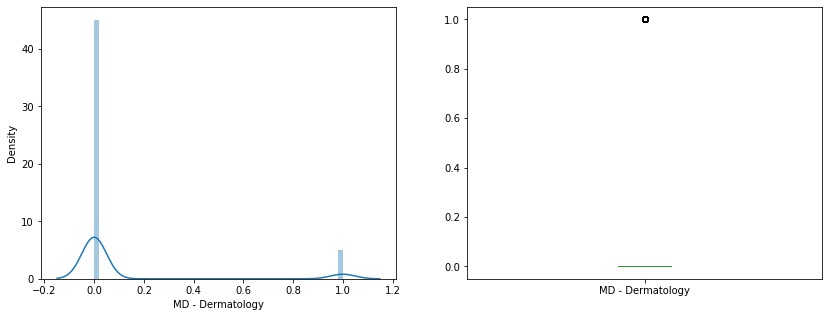

<Figure size 1008x360 with 0 Axes>

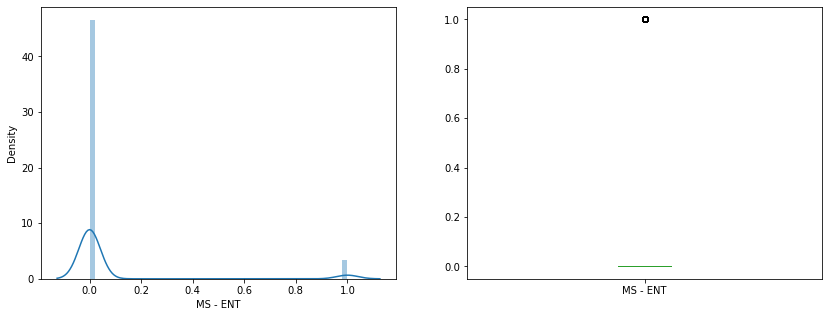

<Figure size 1008x360 with 0 Axes>

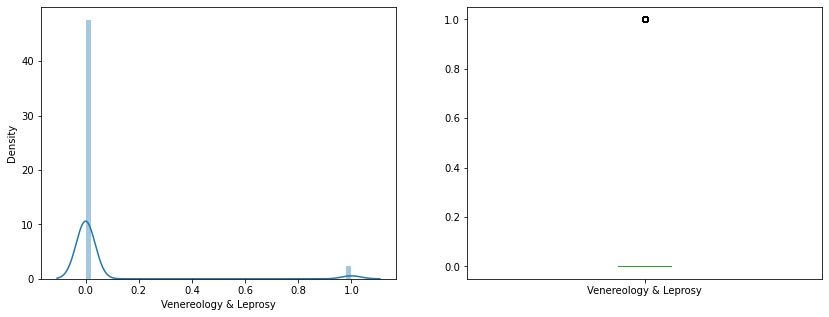

<Figure size 1008x360 with 0 Axes>

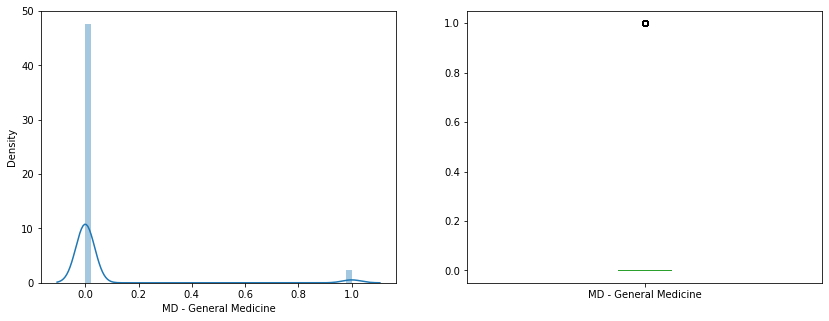

<Figure size 1008x360 with 0 Axes>

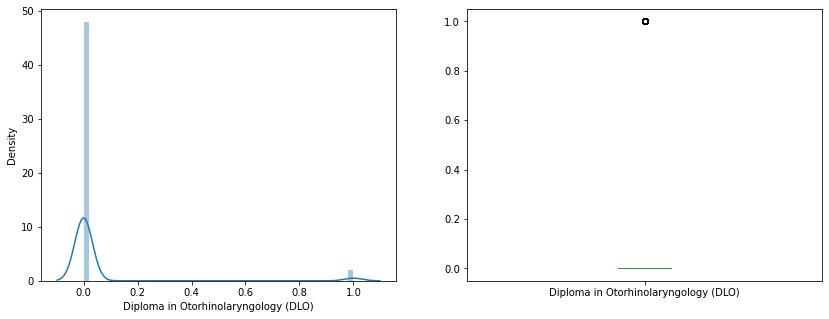

<Figure size 1008x360 with 0 Axes>

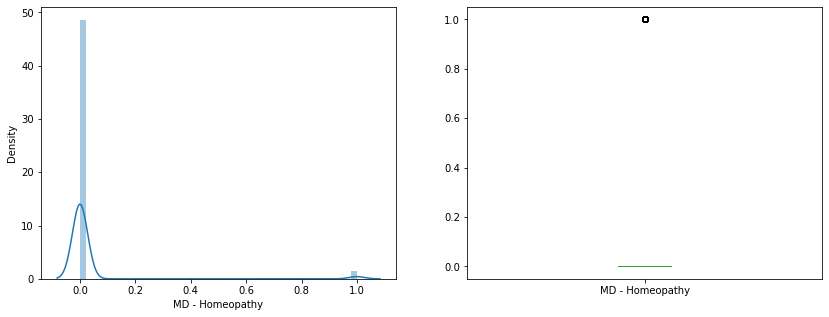

<Figure size 1008x360 with 0 Axes>

In [826]:
for i in range(0,len(df.columns)):
    plt.subplot(121)
    sns.distplot(df[df.columns[i]])
    plt.subplot(122)
    df[df.columns[i]].plot.box(figsize=(14,5))
    plt.figure(figsize=(14,5))
    plt.show()

We can see that data is slightly skewed and some of the variables have got Outliers.

we need to treat outliers for Experience and Rating column

In [827]:
df.skew()

Experience                              0.984224
Rating                                 -4.488454
Profile                                 0.088789
Fees                                    0.751870
Source                                 -1.154919
City                                    0.010037
MBBS                                    0.126091
BDS                                     1.283447
BAMS                                    2.221212
BHMS                                    2.258682
MD - Dermatology                        2.676054
MS - ENT                                3.407118
Venereology & Leprosy                   4.188374
MD - General Medicine                   4.265539
Diploma in Otorhinolaryngology (DLO)    4.653745
MD - Homeopathy                         5.675347
dtype: float64

we need to deal with skewness in Experience and Rating.

For other variables, we dont need to reduce skewness as they are categorical.

# Removing the Outliers

In [828]:
IQR=df.Experience.quantile(0.75)-df.Experience.quantile(0.25)
lower_bridge=df['Experience'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Experience'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

-12.0
44.0


(None, None)

In [829]:
data=df.copy()

In [830]:
data.loc[data['Experience']>44,'Experience'] = 44

<function matplotlib.pyplot.show(close=None, block=None)>

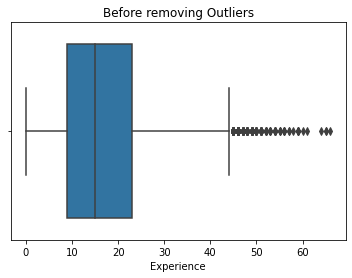

In [831]:
sns.boxplot(df['Experience'])
plt.title('Before removing Outliers')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

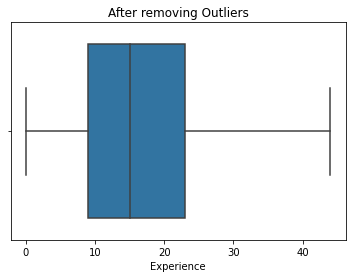

In [832]:
sns.boxplot(data['Experience'])
plt.title('After removing Outliers')
plt.show

In [833]:
df['Experience'] = data['Experience']

In [834]:
IQR=df.Rating.quantile(0.75)-df.Rating.quantile(0.25)
lower_bridge=df['Rating'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Rating'].quantile(0.75)+(IQR*1.5)
print(lower_bridge),print(upper_bridge)

95.0
103.0


(None, None)

In [835]:
data.loc[data['Rating']>103,'Rating'] = 103
data.loc[data['Rating']<95,'Rating'] = 95

<function matplotlib.pyplot.show(close=None, block=None)>

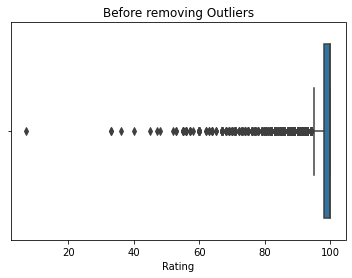

In [836]:
sns.boxplot(df['Rating'])
plt.title('Before removing Outliers')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

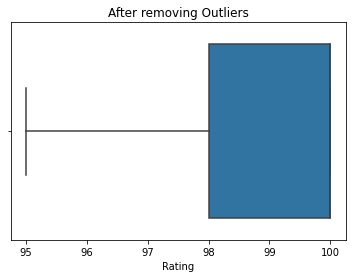

In [837]:
sns.boxplot(data['Rating'])
plt.title('After removing Outliers')
plt.show

In [838]:
df['Rating'] = data['Rating']

# Spliting the dataset

In [839]:
df_train=df.loc[df["Source"]==1]
df_test=df.loc[df["Source"]==0]

In [840]:
df_train.drop(columns=["Source"],inplace=True)
df_test.drop(columns=["Source"],inplace=True)

In [841]:
x=df_train.drop(columns=["Fees"])
y=df_train[["Fees"]]

# Removing the skewness

In [842]:
from sklearn.preprocessing import power_transform

In [843]:
dt=power_transform(x)

In [844]:
dt = pd.DataFrame(dt,columns=x.columns)

In [845]:
dt.skew()

Experience                             -0.010079
Rating                                 -0.857268
Profile                                -0.139151
City                                   -0.216533
MBBS                                    0.118000
BDS                                     1.293695
BAMS                                    2.229777
BHMS                                    2.261706
MD - Dermatology                        2.639954
MS - ENT                                3.403459
Venereology & Leprosy                   4.171950
MD - General Medicine                   4.239699
Diploma in Otorhinolaryngology (DLO)    4.581912
MD - Homeopathy                         5.475409
dtype: float64

we have removed skewness to the extent

In [846]:
x=dt

# Scaling the data

In [847]:
from sklearn.preprocessing import StandardScaler

In [848]:
sc=StandardScaler()

In [849]:
df_x=sc.fit_transform(x)

In [850]:
df_x=pd.DataFrame(df_x,columns=x.columns)

In [851]:
x=df_x

In [852]:
x.shape

(5961, 14)

In [853]:
y.shape

(5961, 1)

In [854]:
df_test.shape

(1987, 15)

# Finding the best random state

In [855]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [856]:
maxr2=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=i)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    lm.score(x_train,y_train)
    lm.score(x_test,y_test)
    ypred=lm.predict(x_test)
    acc=r2_score(y_test,ypred)
    if acc>maxr2:
        maxr2=acc
        maxRS=i
print('Best accuracy is',maxr2, 'for random state',maxRS)

Best accuracy is 0.16087780986154954 for random state 27


In [857]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

In [858]:
lm=LinearRegression()
knn=KNeighborsRegressor()
rf=RandomForestRegressor()

model =[lm,knn,rf]
for i in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=199)
    i.fit(x_train,y_train)
    pred=i.predict(x_test)
    print('R2 score for',i, 'is',r2_score(pred,y_test))
    cvs=cross_val_score(i,x,y,cv=5)
    print('Cross validation score for',i, 'is',cvs.mean())
    print('Difference between R2 score and Cross Validation Score is',r2_score(pred,y_test) - cvs.mean())
    print('\t')
    print('\t')

R2 score for LinearRegression() is -5.417452412628689
Cross validation score for LinearRegression() is 0.11772613315271616
Difference between R2 score and Cross Validation Score is -5.535178545781405
	
	
R2 score for KNeighborsRegressor() is -1.57410703002342
Cross validation score for KNeighborsRegressor() is 0.011514243143278136
Difference between R2 score and Cross Validation Score is -1.585621273166698
	
	
R2 score for RandomForestRegressor() is -1.3504067646726354
Cross validation score for RandomForestRegressor() is -0.017435996595704762
Difference between R2 score and Cross Validation Score is -1.3329707680769307
	
	


# Hyper parameter tuning

In [859]:
from sklearn.model_selection import GridSearchCV

In [860]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [861]:
GCV = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3)
GCV.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [862]:
GCV.best_params_

{'criterion': 'mse',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 500}

In [863]:
rfr = RandomForestRegressor(random_state=27, max_features='auto', n_estimators= 500, max_depth=6, criterion='mse')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))

0.16535886584857495


# Saving the model

In [864]:
import pickle

In [865]:
pickle.dump(rfr, open('doctfeesrfr.pkl', 'wb'))

In [866]:
mod = pickle.load(open('doctfeesrfr.pkl', 'rb'))

In [867]:
mod

RandomForestRegressor(max_depth=6, n_estimators=500, random_state=27)

In [869]:
predictions = mod.predict(x_test)

In [870]:
predictions

array([390.79746672, 308.77127547, 405.59491758, ..., 148.93136298,
       316.34063504, 218.12242556])